Wykorzystywane dane to [ilość zgonów dla roku 2020](https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/zgony-wedlug-tygodni,39,2.html) i [ludność województw](https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/powierzchnia-i-ludnosc-w-przekroju-terytorialnym-w-2020-roku,7,17.html) ze strony https://stat.gov.pl


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'readxl' was built under R version 4.0.3"
Warning message in eval(substitute(list(...)), `_data`, parent.frame()):
"NAs introduced by coercion"


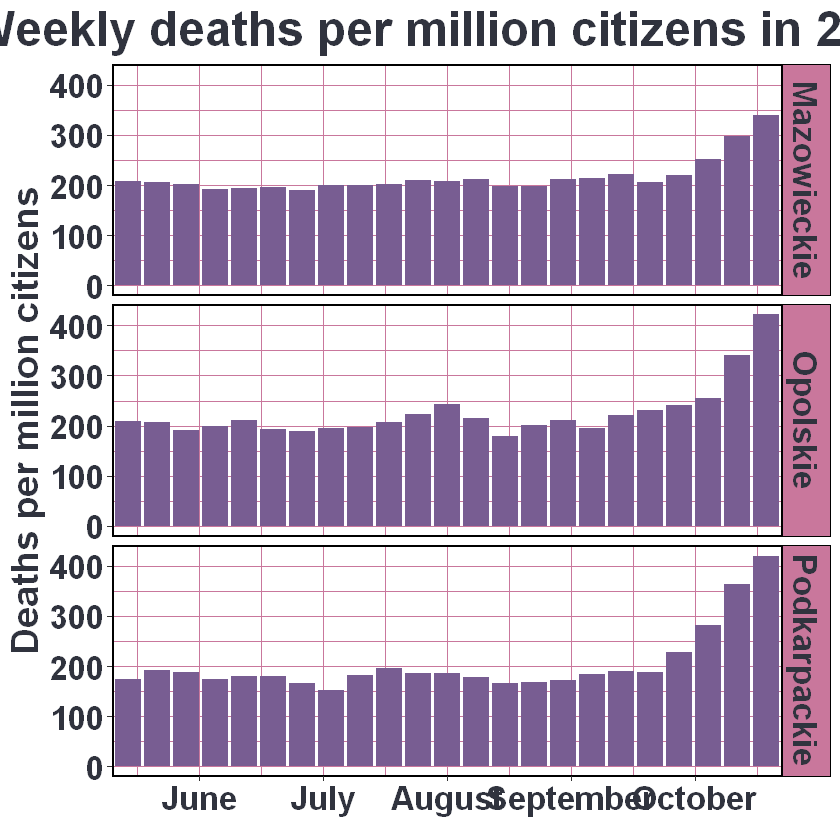

In [1]:
library(dplyr)
library(tidyr)
library(tibble)
library(ggplot2)
library("readxl")
s <- Sys.setlocale("LC_CTYPE","polish")

woj <- c("PL52"="Opolskie", "PL82"="Podkarpackie", "PL9"="Mazowieckie")
weeks <- 25:47
offset <- -4

suppressMessages(DP <- read_excel("data/population/2020.xlsx", 2))
DP <- transform(DP, ...5=as.numeric(...5)) %>%
      filter(!is.na(...5) ) %>%
      select(2, 5) %>%
      deframe()

suppressMessages(DT <- read_excel("data/deaths/2020.xlsx"))
DT <- filter(DT, DT[[2]] %in% names(woj))
colnames(DT)[1] <- "Wiek"
colnames(DT)[weeks] <- weeks+offset

DT <- gather(DT, "Week", "Deaths", all_of(weeks)) %>%
  filter(startsWith(Wiek, "Og")) %>%
  select(Region = 2, Week, Deaths) %>%
  mutate(Region = woj[Region], Deaths = as.numeric(Deaths)/DP[Region]*10**6)

par(bg="transparent")
p <- ggplot(DT, aes(x = as.numeric(Week), y = as.numeric(Deaths))) +
  geom_col(fill="#785d92") + 
  labs(y="Deaths per million citizens",
       x=element_blank(),
       title="Weekly deaths per million citizens in 2020") +
  scale_y_continuous(breaks = seq(0, 500, 100), labels=seq(0, 500, 100), expand = c(0,20)) +
  scale_x_continuous(breaks = seq(2, 50, 30/7), labels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"), expand = c(0.005,0)) +
  theme(panel.background = element_rect(fill = "transparent",colour = NA),
        plot.background = element_rect(fill = "transparent",colour = NA),
        panel.grid = element_line(colour = "#c9779c"), 
        strip.background = element_rect(fill = "#c9779c", colour = "black"),
        
        title = element_text(colour = "#30333e", family="sans", size=24, face="bold"),
        plot.title = element_text(colour = "#30333e", family="sans", face="bold", hjust = 0.5),
        axis.text = element_text(colour = "#30333e", family="sans", size=20, face="bold"),
        axis.title = element_text(colour = "#30333e", family="sans", size=22, face="bold"),
        strip.text = element_text(colour = "#30333e", family="sans", size=20, face="bold"),
        panel.border = element_rect(colour = "black", fill=NA, size=1)
        ) +
  facet_grid(Region ~ .)
ggsave("charts/weekly_deaths.png", p, bg = "transparent", width=3149/300, height=2418/300)
p